In [1]:
import tensorflow as tf


C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/cor

In [2]:
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical # THIS IS USED FOR ONE HOT ENCODING
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [5]:
print("X Training data shape is ",x_train.shape)
print("Y Training data shape is ",y_train.shape)
print("X Test data shape is ",x_test.shape)
print("Y Test data shape is ",y_test.shape)

X Training data shape is  (60000, 28, 28)
Y Training data shape is  (60000,)
X Test data shape is  (10000, 28, 28)
Y Test data shape is  (10000,)


In [6]:
print(len(x_train))

60000


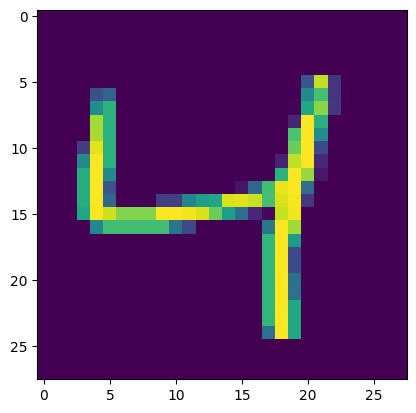

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()


In [8]:
plt.figure(figsize=(10,2))

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

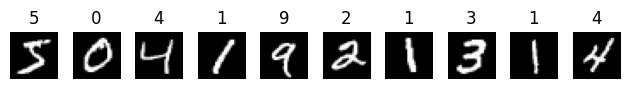

In [9]:

for i in range(10):
    
    plt.subplot(1,10, i+1)
    plt.imshow(x_train[i],cmap="grey")
    plt.title(str(y_train[i]))
    # plt.title(np.where((y_train[i])==1)[0])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [10]:
# When you need to find a particular digit in a numpy array

# np.where((y_train[3])==1)[0]

In [11]:
print("Shape of x_train is",x_train.shape)
print("length of x_train is",len(x_train))

# This basically means we have 60,000 samples of images
# and the dimenstion of an image is 28X28

Shape of x_train is (60000, 28, 28)
length of x_train is 60000


In [12]:
# Now as we can see that the image is saved in a 2D array of size 28X28 se we need to convert it into 1D array so we can apply
# training on it

# we need the dimension to be (60000, 784)
# coz 78*78 = 784

# To convert 2D array to 1D array we will use reshape method of pandas
# SYNTAX :- array_name.reshape(rowsXcols)

In [13]:
x_train_flat = x_train.reshape(60000,784)

In [14]:
x_train_flat.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
# Lets flatten x_test as well

x_test_flat = x_test.reshape(10000,784)

In [17]:
x_test_flat.shape

(10000, 784)

In [18]:
# Now our input layer is completetly prepared and it can be used for training


In [19]:
import keras

In [20]:
# keras.Sequential helps us to create stacks of layers(i.e input layer, hidded layer etc)very easily

# define a path/folder where the log files will be saved for the Tensorboard as shown below

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="log_dir/", histogram_freq=1)

model = keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


# once the sequense has been created then we have to compie the model
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

# Once the model is compiled then we have to use the fit() method to chech the score

# add a callback argument in the fit method as shown below 

model.fit(x_train_flat, y_train, epochs=5, callbacks=[tb_callback])

C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2981 - loss: 319.9403  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3011 - loss: 257.5822
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3043 - loss: 254.7673
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2999 - loss: 242.6821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2990 - loss: 241.6971


In [21]:
# As we can see here the accuracy is very low between 26-27 this is because the values in the array are from 0 to 255
# and our values are not scaled basically the range is too wide we need to contain it within 0-1

In [22]:
# lets scale the train and test dataset

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [23]:
x_train_flat = x_train_scaled.reshape(60000,784)
x_test_flat = x_test_scaled.reshape(10000,784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

# once the sequense has been created then we have to compie the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

# Once the model is compiled then we have to use the fit() method to chech the score
model.fit(x_train_flat, y_train, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8741 - loss: 0.4743
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9234 - loss: 0.2736
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9263 - loss: 0.2667


In [25]:
# As we can see now that the accuracy has been increased drasticaly to 92 this is because of scaling

In [26]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2646    


[0.2646074891090393, 0.9266999959945679]

In [27]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [28]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # 28x28 images to 784 input features
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9259 - loss: 0.2582
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9665 - loss: 0.1127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9761 - loss: 0.0781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9821 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9858 - loss: 0.0456


In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0712    
Test accuracy: 0.9784


In [32]:
# # Load the TensorBoard extension
# %load_ext tensorboard

# # Launch TensorBoard (you can now view it in your Colab environment)
# %tensorboard --logdir logs/

## How to run Tensorboard

In [33]:
# Open a terminal in the same folder where you have saved your python file

# then run this command:-

# --------------------tensorboard --logdir=./

# this will run a server genrally at 6000 port and then you can access the tensorboard at that address